In [0]:
from tensorflow import keras

import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

Using TensorFlow backend.


In [0]:
train_labels=[]
train_samples=[]


In [0]:
for i in range(50):
   random_younger=randint(13,64)
   train_samples.append(random_younger)
   train_labels.append(0)
  
   random_older=randint(65,100)
   train_samples.append(random_older)
   train_labels.append(1) 





for i in range(1000):
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)
  
  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)
  
  
  
  

  

# Keras is expecting features and lables as numpy arrays

In [0]:
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)


#Features Sacling for faster computation





In [0]:
#first you have to define the scaler range 

scaler=MinMaxScaler(feature_range=(0,1))

## Scaling all the data to the scaler , 

scaled_train_examples=scaler.fit_transform((train_samples).reshape(-1,1))

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Defining Layers for the Neural network Sequential(l1,l2,l3,....) We can also use
model.add(l5) #Or
model.append(l6)

In [0]:
#if the activation function is not defined , Keras will define teh linear activation functon

model=Sequential([Dense(16, input_shape=(1,) ,activation='relu'),Dense(32,activation='relu'),Dense(2,activation='softmax')])
                  

relu is nearlz the same as logisic regression. Softmax is to force the output to have probability distribution

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# Train an artificial neural network 

lr is the learning rate 
Loss is the choice of the cost function , it may be mean square error or mean absolute error 

In [0]:
model.compile(Adam(lr=0.0001), loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

# we are fitting our data to the model
The training Examples , the labels and the batch 
the batch is how many of my training examples I want to process in a time
Example by Example or group by group


In [0]:
model.fit(scaled_train_examples,train_labels,validation_split=0.1,batch_size=10,epochs=20,shuffle=True,verbose=2)


#Building a Validation Set Using Keras
The validation set will always be the last 10% of the data , there will be no shuffle in the data


# Predicting 


In [0]:
test_labels=[]
test_samples=[]

for i in range(10):
   random_younger=randint(13,64)
   test_samples.append(random_younger)
   test_labels.append(0)
  
   random_older=randint(65,100)
   test_samples.append(random_older)
   test_labels.append(1) 





for i in range(200):
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)
  
  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)
  
  
test_labels=np.array(test_labels)
test_samples=np.array(test_samples)

  
#first you have to define the scaler range 

scaler=MinMaxScaler(feature_range=(0,1))

## Scaling all the data to the scaler , 

scaled_test_examples=scaler.fit_transform((test_samples).reshape(-1,1))

In [0]:
predictions=model.predict_classes(scaled_test_examples,batch_size=10,verbose=0)

In [0]:
for i in predictions:
  print (i)

NameError: ignored

In [0]:
predictions1=model.predict(scaled_test_examples,batch_size=10,verbose=0)

In [0]:
predictions1
  

array([[0.0828815 , 0.91711855],
       [0.8969077 , 0.10309236],
       [0.08774716, 0.91225284],
       [0.8763385 , 0.12366156],
       [0.06905137, 0.9309487 ],
       [0.95870024, 0.04129973],
       [0.4512563 , 0.5487437 ],
       [0.62769413, 0.37230587],
       [0.07297575, 0.92702425],
       [0.96107197, 0.03892805],
       [0.12574147, 0.8742586 ],
       [0.674248  , 0.325752  ],
       [0.07040371, 0.9295963 ],
       [0.80928856, 0.19071138],
       [0.11523139, 0.8847686 ],
       [0.578645  , 0.42135498],
       [0.07853586, 0.92146415],
       [0.578645  , 0.42135498],
       [0.47675827, 0.5232417 ],
       [0.6963599 , 0.30364016],
       [0.07512981, 0.9248702 ],
       [0.674248  , 0.325752  ],
       [0.09919232, 0.9008076 ],
       [0.8763385 , 0.12366156],
       [0.42600793, 0.5739921 ],
       [0.8246184 , 0.1753816 ],
       [0.07193673, 0.9280633 ],
       [0.9274625 , 0.07253749],
       [0.0683021 , 0.9316979 ],
       [0.9274626 , 0.07253745],
       [0.

## Confusion Matrix

In [0]:
% matplotlib inline
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


predictions_new=[]

for i in predictions:

   predictions_new.append(i)

In [0]:
cm=confusion_matrix(test_labels,predictions)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[200  10]
 [ 19 191]]


NameError: ignored

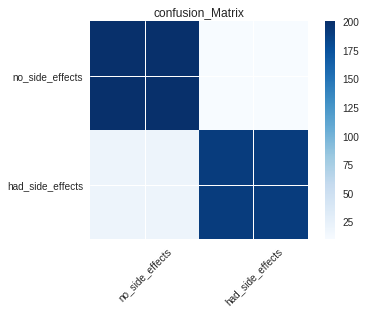

In [0]:
cm_plot_labels=['no_side_effects','had_side_effects']
plot_confusion_matrix(cm,cm_plot_labels,title='confusion_Matrix')

In [0]:
model.save('medical_trial_model.h')

In [0]:
import pandas as pd
sf =pd.DataFrame ({'x':[1,2,3,4,5,6],
'y':['a','b','c','d','e','f']})

sf

,x,y
0,1,a
1,2,b
2,3,c
3,4,d
4,5,e
5,6,f
